In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRData.csv")
#data

In [ ]:
data = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRData.csv")

In [5]:
countries = ["China", "US", "Italy", "New Zealand", "South Korea", "United Kingdom", "Iran", "Australia", 
             "India", "Peru"]

df = pd.DataFrame()

for x in range(len(countries)):
    dataU = data[data["Country/Region"] == countries[x]]  
    groupDate = dataU.groupby("Last Update")
    df1 = groupDate.count()

    df1 = list(df1.index.values)
    #df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

    dfDate = pd.DataFrame(df1)
    
    dataC = data[data["Country/Region"] == countries[x]]
    groupC = dataC.groupby("Last Update")
    dC = groupC.sum()
    dC = list(dC["Confirmed"].values)
    
    dC.sort()
    
    dfC = pd.DataFrame({countries[x]: dC})
    dfC = pd.concat([dfDate,dfC], axis=1, sort = False)
    dfC = dfC.rename(columns={0: "Date"})
    dfC = dfC.set_index('Date')
    
    df = pd.concat([df,dfC], axis=1, sort = False)
    
#df

In [20]:
df[['US','Italy','South Korea','United Kingdom', 'Iran','Australia', 'India', 'Peru']]= df[['US','Italy','South Korea','United Kingdom', 'Iran','Australia', 'India', 'Peru']].interpolate()
df=df.fillna(0)
#df

Text(-10, 115700, 'Boxplot for all of the Countries')

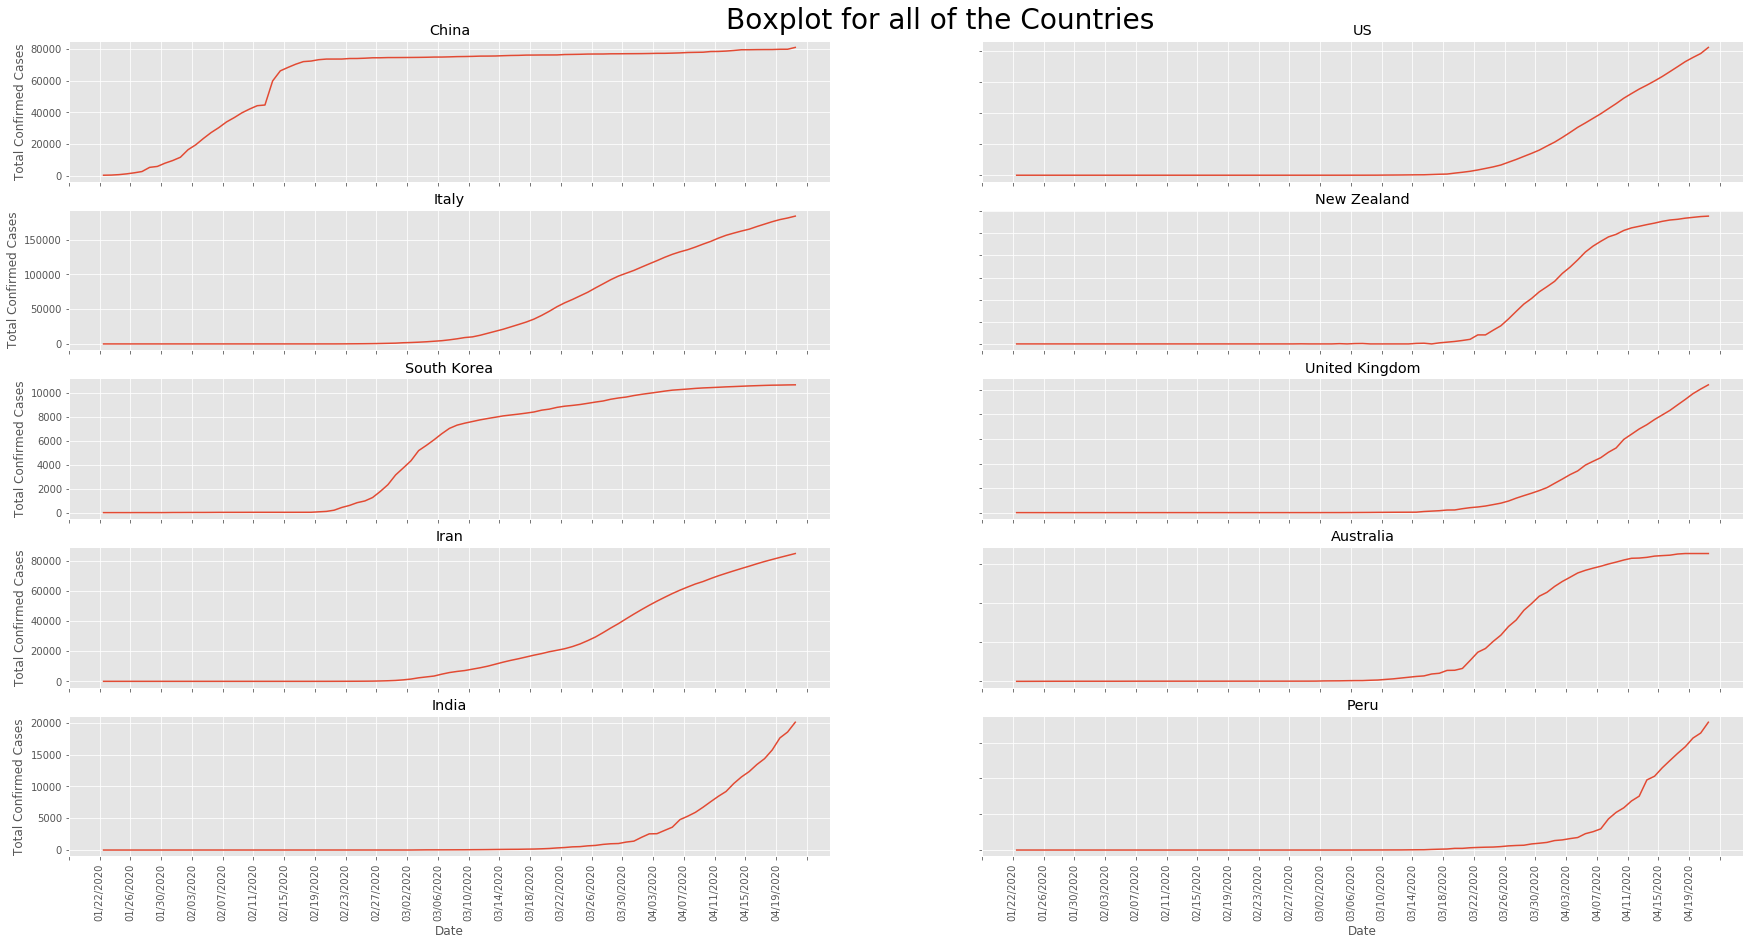

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30, 15)

countries = ["China", "US", "Italy", "New Zealand", "South Korea", "United Kingdom", "Iran", "Australia", 
             "India", "Peru"]

fig, axs = plt.subplots(5, 2)
for i in range(5):
    axs[i,0].plot(pd.DataFrame(df[countries[2*i]]))
    axs[i,0].set_title(countries[2*i])
    axs[i,1].plot(pd.DataFrame(df[countries[2*i+1]]))
    axs[i,1].set_title(countries[2*i+1])  
    
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Total Confirmed Cases')
    ax.tick_params(labelrotation=90, axis = 'x')
       
for ax in axs.flat:
    ax.label_outer()
    
stepsize = 4
for ax in axs.flat:
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, stepsize))
    
plt.text(-10, 115700, 'Boxplot for all of the Countries', ha='center', va='center', rotation='horizontal', fontsize=28)

Text(35, -15000, 'Dates')

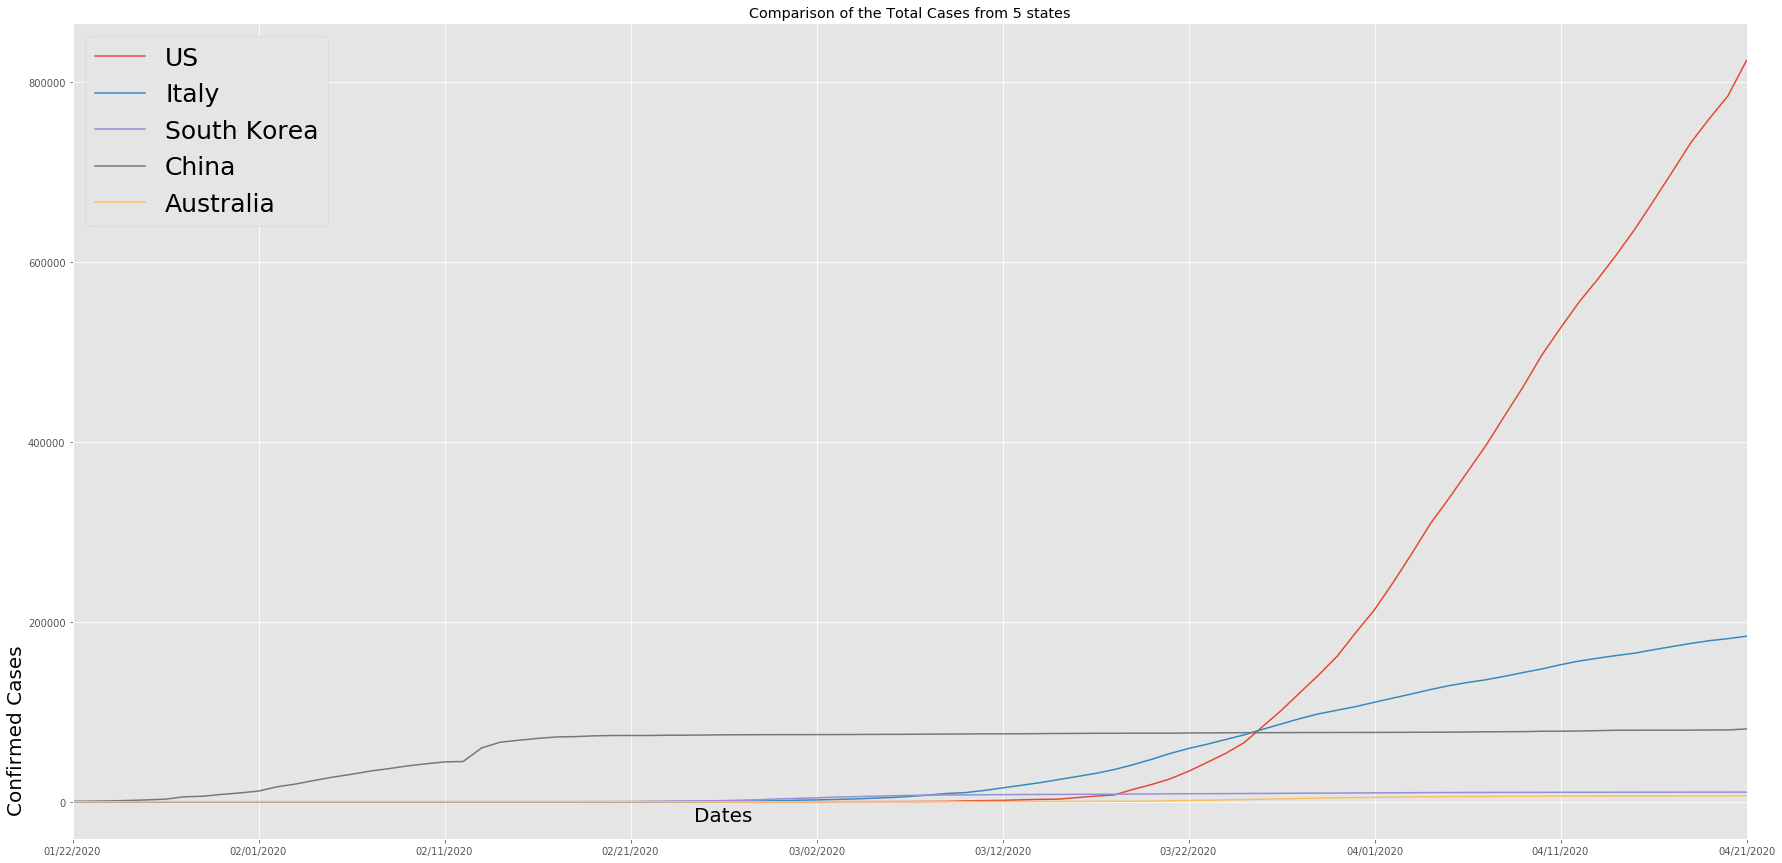

In [8]:
countries = ['US','Italy','South Korea','China','Australia']

dfdata = pd.DataFrame()

for x in range(len(countries)):
    df1 = pd.DataFrame(df[countries[x]])
    dfdata = pd.concat([dfdata, df1], axis = 1, sort = False)

dfdata    
dfdata.plot(grid = True, title="Comparison of the Total Cases from 5 states")
plt.xlab = "Date" 
plt.ylab = "Total Confirmed Cases"
plt.legend(loc=2, prop={'size': 25})

plt.text(-3, 80000, 'Confirmed Cases', ha='center', va='center', rotation='vertical', fontsize=20)
plt.text(35, -15000, 'Dates', ha='center', va='center', rotation='horizontal', fontsize=20)